# TASK 2 - Prediction using Unsupervised ML
## Graduate Rotational Internship Program (GRIP) The Spark Foundation
## Data Science and Business Analytics Internship
### Author: Claudia Jocelyn Sutanto

The purpose is to predict the optimum number of clusters.

## Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load datasets
from sklearn.datasets import load_iris
iris = load_iris()

## Preliminary Analysis and Preparation Data

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X= pd.DataFrame(iris['data'], columns =iris["feature_names"] ) #make dataframe from iris data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
y = pd.DataFrame(iris["target"], columns = ["species"])
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
df = X.join(y, lsuffix='_caller', rsuffix='_other')

## Visualizing

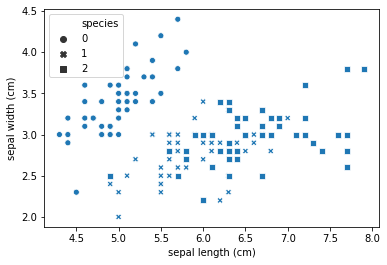

In [13]:
sns.scatterplot(X["sepal length (cm)"], X["sepal width (cm)"], style = df["species"])

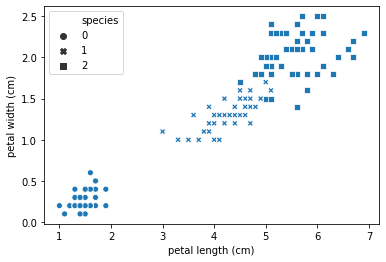

In [14]:
sns.scatterplot(X["petal length (cm)"], X["petal width (cm)"], style = df["species"])

Text(0.5, 1.0, 'DISTRIBUTION OF SEPAL LENGTH')

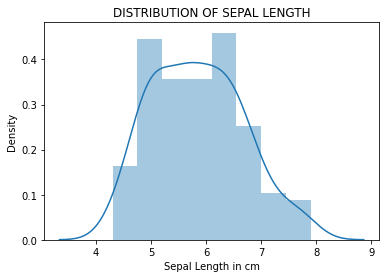

In [15]:
#plot the distribution of sepal length
sns.distplot(X["sepal length (cm)"])
plt.xlabel("Sepal Length in cm") 
plt.ylabel("Density")
plt.title("DISTRIBUTION OF SEPAL LENGTH")

Text(0.5, 1.0, 'DISTRIBUTION OF SEPAL WIDTH')

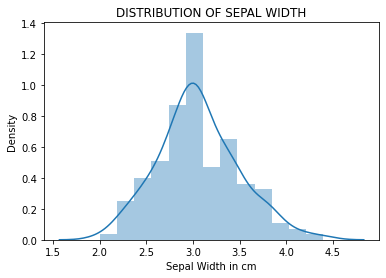

In [16]:
#plot the distribution of sepal width
sns.distplot(X["sepal width (cm)"])
plt.xlabel("Sepal Width in cm") 
plt.ylabel("Density")
plt.title("DISTRIBUTION OF SEPAL WIDTH")

Text(0.5, 1.0, 'DISTRIBUTION OF PETAL LENGTH')

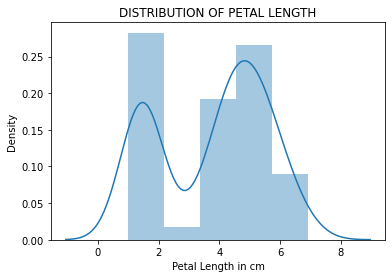

In [17]:
#plot the distribution of petal length
sns.distplot(X["petal length (cm)"])
plt.xlabel("Petal Length in cm") 
plt.ylabel("Density")
plt.title("DISTRIBUTION OF PETAL LENGTH")

Text(0.5, 1.0, 'DISTRIBUTION OF PETAL WIDTH')

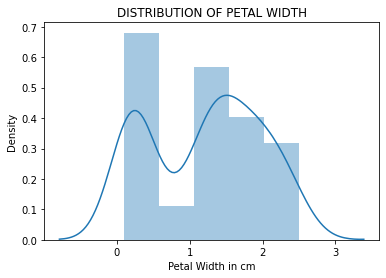

In [18]:
#plot the distribution of petal width
sns.distplot(X["petal width (cm)"])
plt.xlabel("Petal Width in cm") 
plt.ylabel("Density")
plt.title("DISTRIBUTION OF PETAL WIDTH")

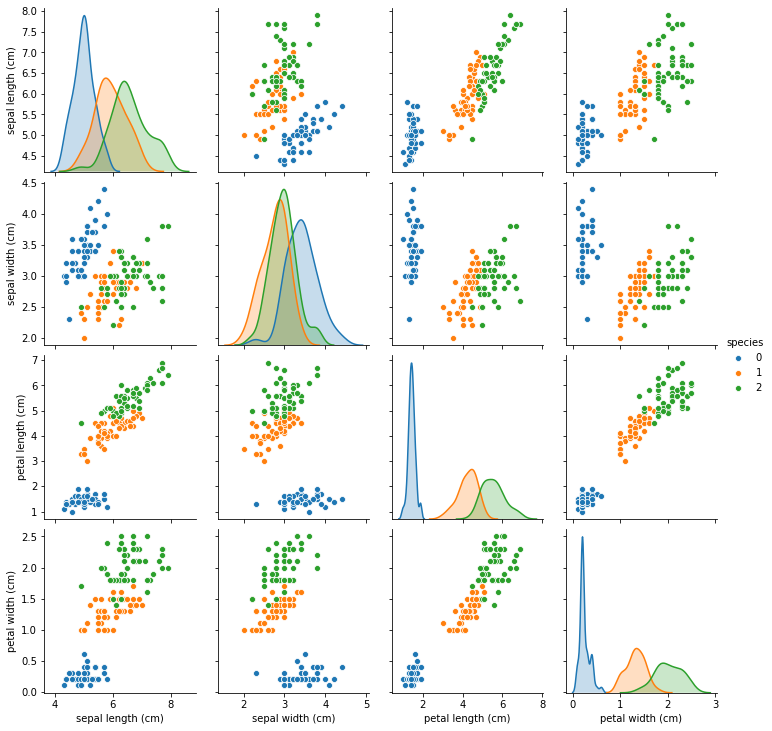

In [19]:
sns.pairplot(df, hue="species")

## Elbow Method for Clustering using KMeans

In [20]:
X1 = X.iloc[:, [0, 1, 2, 3]].values #make X dataframe into array
X1

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

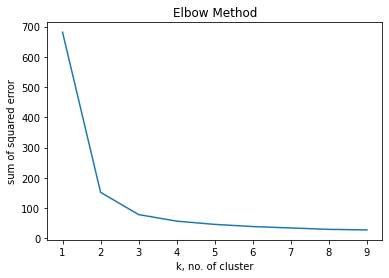

In [21]:
#Elbow method
from sklearn.cluster import KMeans
wcss = []
cluster_range = range(1,10)

for k in cluster_range:
    km = KMeans(n_clusters= k)
    km.fit(X1)
    inertia = km.inertia_
    wcss.append(inertia)
#print(wcss)
plt.title("Elbow Method")
plt.xlabel("k, no. of cluster")
plt.ylabel("sum of squared error")
plt.plot(cluster_range,wcss)

From the elbow method, we choose 3 as the number of clusters (k).

## KMeans

In [22]:
km = KMeans(n_clusters=3) #Number of clusters/centroids are three
km.fit_predict(X1)
y_cluster = km.labels_ #data point into cluster number 0,1,2
y_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [23]:
km.cluster_centers_ #three centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Visualizing KMeans

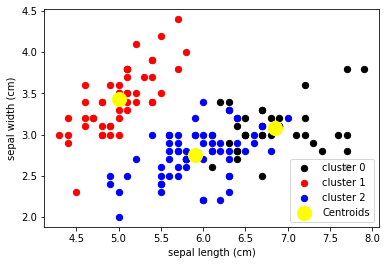

In [24]:
# Visualising the clusters in 2D on the sepal length and sepal width
plt.scatter(X1[y_cluster == 0, 0], X1[y_cluster == 0, 1], s = 40, c = 'black', label = 'cluster 0')
plt.scatter(X1[y_cluster == 1, 0], X1[y_cluster == 1, 1], s = 40, c = 'red', label = 'cluster 1')
plt.scatter(X1[y_cluster == 2, 0], X1[y_cluster == 2, 1], s = 40, c = 'blue', label = 'cluster 2')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

# The centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

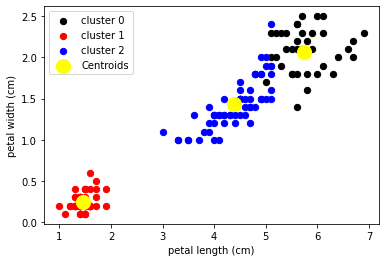

In [25]:
# Visualising the clusters in 2D on the petal length and petal width
plt.scatter(X1[y_cluster == 0, 2], X1[y_cluster == 0, 3], s = 40, c = 'black', label = 'cluster 0')
plt.scatter(X1[y_cluster == 1, 2], X1[y_cluster == 1, 3], s = 40, c = 'red', label = 'cluster 1')
plt.scatter(X1[y_cluster == 2, 2], X1[y_cluster == 2, 3], s = 40, c = 'blue', label = 'cluster 2')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

# The centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [26]:
y_cluster = pd.DataFrame(y_cluster, columns = ["y_cluster"])

In [27]:
df = df.join(y_cluster, lsuffix='_caller', rsuffix='_other')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,y_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0
